In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (15, 15)

In [4]:
img = cv2.imread('opencv.jpeg')
im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
im_gray = 255 - im_gray

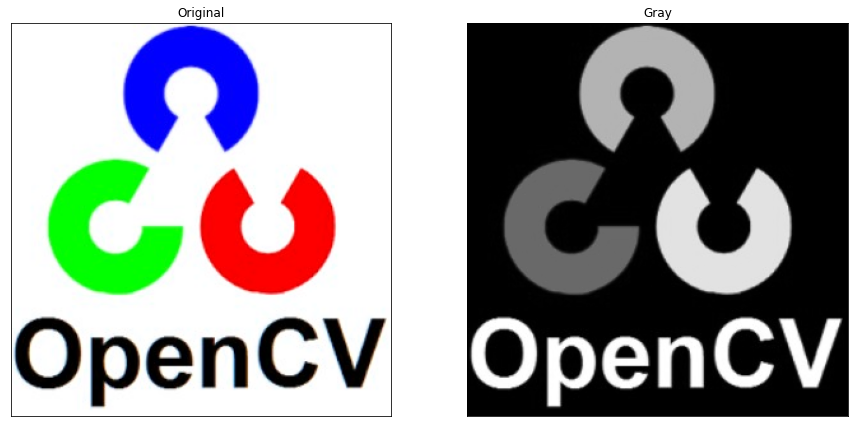

In [5]:
plt.subplot(121)
plt.imshow(img)
plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(im_gray, cmap='gray')
plt.title('Gray')
plt.xticks([]), plt.yticks([])

plt.show()

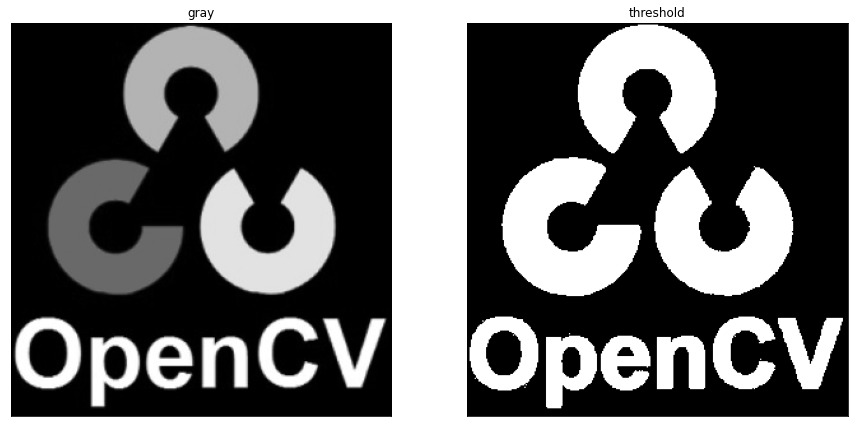

In [6]:
ret, thresh = cv2.threshold(im_gray, 8, 255, cv2.THRESH_BINARY)

plt.subplot(121)
plt.imshow(im_gray, cmap='gray')
plt.title('gray')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(thresh, cmap='gray')
plt.title('threshold')
plt.xticks([]), plt.yticks([])

plt.show()

In [10]:
cnt, hierachy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

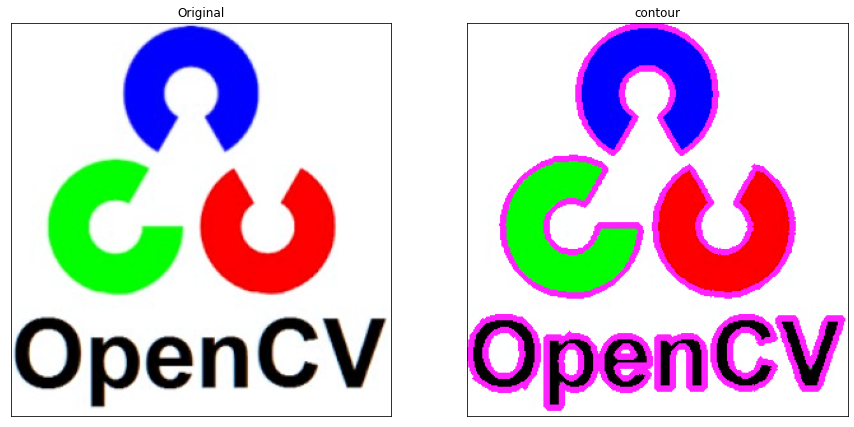

In [11]:
img_cnt = cv2.drawContours(img, cnt, -1, (255,32,255), 3)
img = cv2.imread('opencv.jpeg')

plt.subplot(121)
plt.imshow(img)
plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(img_cnt)
plt.title('contour')
plt.xticks([]), plt.yticks([])

plt.show()

In [17]:
c = cnt[0]
epsilon = 0.01 * cv2.arcLength(c, True)
approx = cv2.approxPolyDP(c, epsilon, True)

In [18]:
img_cnt = cv2.imread('opencv.jpeg')
img_cnt = cv2.drawContours(img_cnt, [c], -1, (255, 32, 255), 3)

img_approx = cv2.imread('opencv.jpeg')
img_approx = cv2.drawContours(img_approx, [approx], -1, (255, 32, 255), 3)
img = cv2.imread('opencv.jpeg')

In [19]:
c.shape, approx.shape

((1, 1, 2), (1, 1, 2))

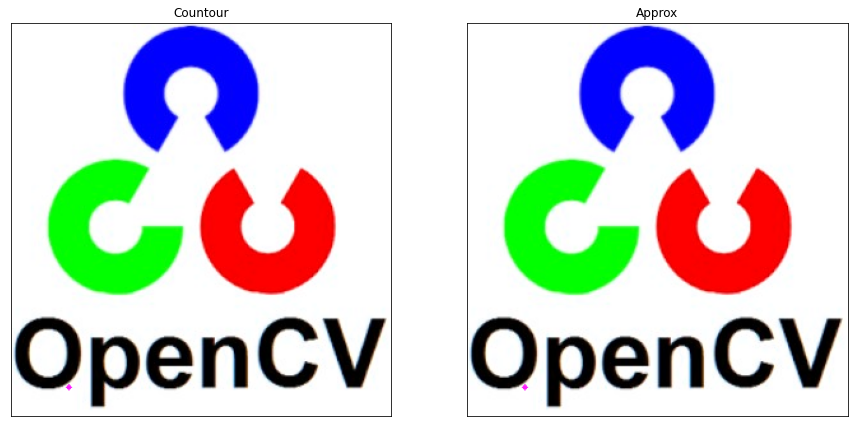

In [20]:
plt.subplot(121)
plt.imshow(img_cnt)
plt.title('Countour')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(img_approx, cmap='gray')
plt.title('Approx')
plt.xticks([]), plt.yticks([])

plt.show()

In [21]:
hull = cv2.convexHull(approx)

In [22]:
img_hull = cv2.imread('opencv.jpeg')
img_hull = cv2.drawContours(img_hull, [hull], -1, (255, 32, 255), 3)

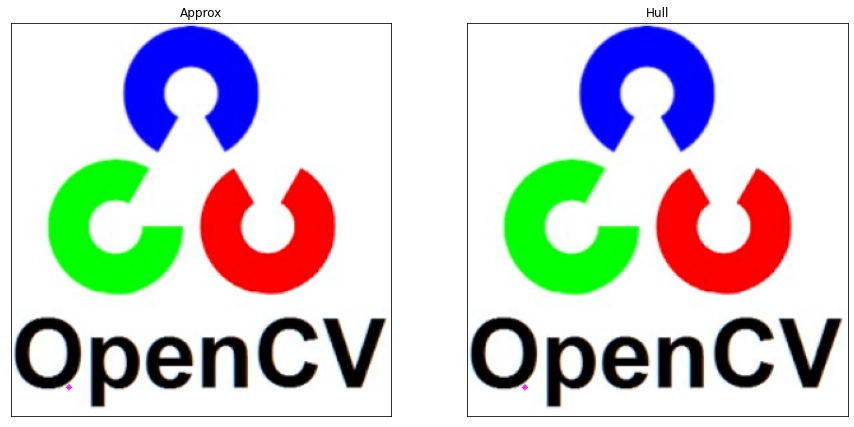

In [23]:
plt.subplot(121)
plt.imshow(img_approx, cmap='gray')
plt.title('Approx')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(img_hull, cmap='gray')
plt.title('Hull')
plt.xticks([]), plt.yticks([])

plt.show()

In [24]:
#x, y, w, h = cv2.boundingRect(c)
img_box = cv2.imread('opencv.jpeg')

for c in cnt:
    x, y, w, h = cv2.boundingRect(c)

    img_box = cv2.rectangle(img_box, (x, y), (x+w, y+h), (255, 0, 0), 2)

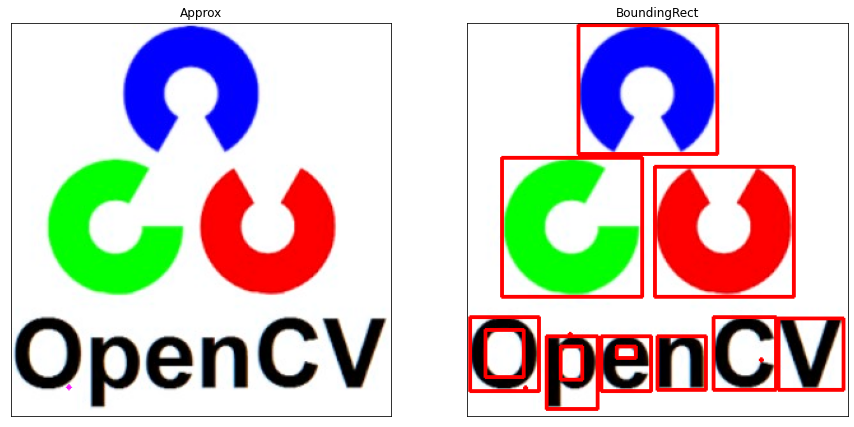

In [25]:
plt.subplot(121)
plt.imshow(img_approx, cmap='gray')
plt.title('Approx')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(img_box)
plt.title('BoundingRect')
plt.xticks([]), plt.yticks([])

plt.show()

In [26]:
img_cnt = cv2.imread('opencv.jpeg')


for c in cnt:
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    box = np.int0(box)

    img_cnt = cv2.drawContours(img_cnt, [box], 0, (0, 0, 255), 2)

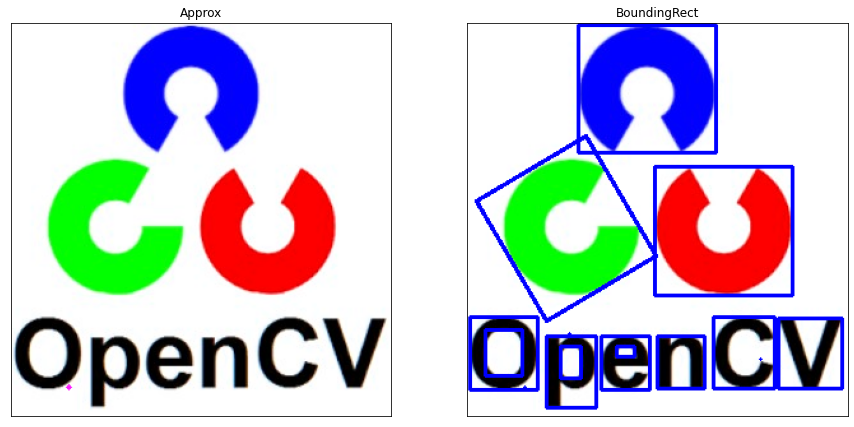

In [27]:
plt.subplot(121)
plt.imshow(img_approx)
plt.title('Approx')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(img_cnt)
plt.title('BoundingRect')
plt.xticks([]), plt.yticks([])

plt.show()

In [28]:
c = cnt[9]
M = cv2.moments(c)
print(M)

{'m00': 1342.0, 'm10': 288328.1666666666, 'm01': 347578.0, 'm20': 62193528.5, 'm11': 74679760.16666666, 'm02': 90423277.0, 'm30': 13468766831.95, 'm21': 16109326564.916666, 'm12': 19430056390.816666, 'm03': 23626947401.0, 'mu20': 246336.47812139988, 'mu11': 2765.0, 'mu02': 400575.0, 'mu30': 661361.62525177, 'mu21': 14565.114380002022, 'mu12': 1218993.0952325314, 'mu03': -179192.0, 'nu20': 0.13678034548241935, 'nu11': 0.001535288878622782, 'nu02': 0.22242254703592076, 'nu30': 0.01002438417637692, 'nu21': 0.00022076621403975457, 'nu12': 0.018476510623533504, 'nu03': -0.00271604728902968}


In [29]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [30]:
area = cv2.contourArea(c)

In [31]:
perimeter = cv2.arcLength(c, True)

In [32]:
img_info = cv2.imread('opencv.jpeg')
img_info = cv2.circle(img_info, (cx, cy), 5, (0, 0, 255), -1)
font = cv2.FONT_HERSHEY_SIMPLEX
msg = f'A{area} L{perimeter}'
img_info = cv2.putText(img_info, msg, (cx, cy), font, 0.5, (32, 32, 32), 1, cv2.LINE_AA)

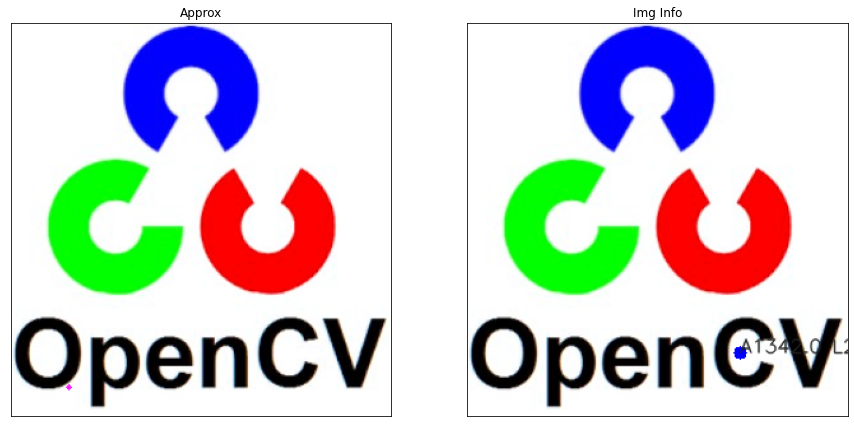

In [33]:
plt.subplot(121)
plt.imshow(img_approx)
plt.title('Approx')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(img_info)
plt.title('Img Info')
plt.xticks([]), plt.yticks([])

plt.show()